# Sentiment Analysis using Textblob

Textblob provides a simple API for text analysis, including sentiment analysis, language detection, and word cloud generation. It uses a combination of NLP techniques and pre-trained models to perform its tasks.
1. **Sentiment Analysis:** uses simple rule-based approach to determine the sentiment of text. It doesn't  rely on a pre-trained model, but rather uses a set of predefined rules to classify text as positive, negative, or neutral.
2. **Language Detection:** uses the `LangDetect` library, which is a pre-trained model that can detect languages based on the text.
3. **Word CloudGeneration:** uses the `WordCloud` library, which generates word clouds based on the frequency of words in the text.

### Libraries

In [1]:
import pandas as pd
from textblob import TextBlob

ModuleNotFoundError: No module named 'textblob'

### Import

In [2]:
df = pd.read_csv('./data/Restaurant_Reviews.tsv', sep='\t')
df.drop(columns=['Liked'], inplace=True)
df

,Review
0,Wow... Loved this place.
1,Crust is not good.
2,Not tasty and the texture was just nasty.
3,Stopped by during the late May bank holiday of...
4,The selection on the menu was great and so wer...
...,...
995,I think food should have flavor and texture an...
996,Appetite instantly gone.
997,Overall I was not impressed and would not go b...
998,"The whole experience was underwhelming, and I ..."


### Classify Reviews

In [3]:
df['polarity'] = df['Review'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

In [4]:
df['sentiment'] = df['polarity'].apply(lambda x: 'positive' if x > 0 else ('neutral' if x == 0 else 'negative'))
df[['Review', 'sentiment']].head()

,Review,sentiment
0,Wow... Loved this place.,positive
1,Crust is not good.,negative
2,Not tasty and the texture was just nasty.,negative
3,Stopped by during the late May bank holiday of...,positive
4,The selection on the menu was great and so wer...,positive


#### Negative Reviews

In [5]:
# Negative Reviews
df[df['sentiment'] == 'negative'].head(10)

,Review,polarity,sentiment
1,Crust is not good.,-0.35000,negative
2,Not tasty and the texture was just nasty.,-1.00000,negative
5,Now I am getting angry and I want my damn pho.,-0.50000,negative
13,"I tried the Cape Cod ravoli, chicken, with cra...",-0.75000,negative
14,I was disgusted because I was pretty sure that...,-0.06250,negative
15,I was shocked because no signs indicate cash o...,-0.35000,negative
17,Waitress was a little slow in service.,-0.24375,negative
18,"This place is not worth your time, let alone V...",-0.15000,negative
29,The worst was the salmon sashimi.,-1.00000,negative
37,"Poor service, the waiter made me feel like I w...",-0.60000,negative


#### Positive Reviews

In [6]:
# Positive Reviews
df[df['sentiment'] == 'positive'].head(10)

,Review,polarity,sentiment
0,Wow... Loved this place.,0.40,positive
3,Stopped by during the late May bank holiday of...,0.20,positive
4,The selection on the menu was great and so wer...,0.80,positive
6,Honeslty it didn't taste THAT fresh.),0.30,positive
8,The fries were great too.,0.80,positive
9,A great touch.,0.80,positive
10,Service was very prompt.,0.20,positive
16,Highly recommended.,0.16,positive
21,"The food, amazing.",0.60,positive
22,Service is also cute.,0.50,positive


### Communicate 

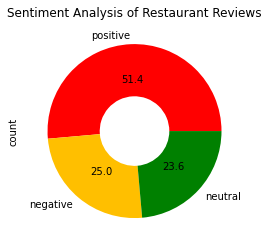

In [7]:
sentiment = df['sentiment'].value_counts()

sentiment_colors = ['red', (1.0, 0.75, 0.0), 'green']

sentiment.plot(
    kind = 'pie', 
    title = 'Sentiment Analysis of Restaurant Reviews',
    colors = sentiment_colors,
    autopct = '%1.1f',
    wedgeprops = dict(width=0.6)
);

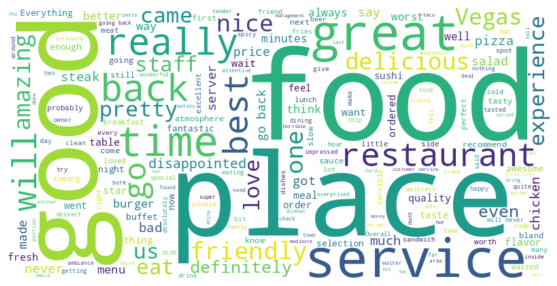

In [8]:
# Word Cloud
from wordcloud import WordCloud
import matplotlib.pyplot as  plt

# Combine all reviews into a single string
text = ''.join(comment for comment in df['Review'].dropna())

# Generate word cloud
wordcloud = WordCloud(background_color='white',
                     width=800,
                     height=400).generate(text)

#  Display the generated word cloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()